<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2023/blob/main/lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 7**


##**<font color = "green">Transfer learning</font>**
##**<font color = "green">Autoencoder</font>**
##**<font color = "green">Reinforcement learning</font>**

*19 April 2023*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**

* ###  <font color='red'>Transfer learning: using pretrained networks.
* ###  <font color='red'>Autoencoder: like PCA, but not linear 
* ###  <font color='red'>Reinforcement learning: how to train a robot?

<br>


**As always all slides are here:** 

*https://github.com/marcinwolter/Machine-learning-KISD-2023*

<br>




# **Ideas about your projects???**

# <font color='green'> **Transfer learning**

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data.

<img src = 'https://editor.analyticsvidhya.com/uploads/444861_2vse-G3FKMT2D59NFWduMA.jpg' width=450px>

The knowledge of an already trained machine learning model is transferred to a different but closely linked problem throughout transfer learning. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the model’s training knowledge to identify other objects such as sunglasses.



# **What is Transfer Learning?**
With transfer learning, we basically try to use what we’ve learned in one task to better understand the concepts in another. Weights are being automatically being shifted to a network performing “task A” from a network that performed new “task B.”


<img src = 'https://editor.analyticsvidhya.com/uploads/751191_rsgubd7aTgUdY65KPYATBA.png' width=450px>

So a network trained to recognize a "cat" can be reused to recognize a "dog".


<img src = 'https://editor.analyticsvidhya.com/uploads/499849315476_1592890541_transfer.jpg' width=500px>

Because the model has trained to recognise objects in the earlier levels, we will simply retrain the subsequent layers to understand what distinguishes sunglasses from other objects.

**Option is to employ a model that has already been trained. There are a number of these models out there, so do some research beforehand. The number of layers to reuse and retrain is determined by the task.**

Keras consists of many pre-trained models used in transfer learning, prediction, fine-tuning. 


# <font color='green'>**An example – pattern recognition**
# <font color='green'>**on CIFAR10 photos dataset**

**CIFAR10** small image classification. <br>Dataset of 50\,000 32x32 color training images\, labeled over 10 categories\, and 10\,000 test images\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/MachineLearning2020_733.png' width=450px>


###<font color = 'red'> **We have done it already**




# Modified version of:
https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb 



In [ ]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

170498071/170498071 [==============================] - 13s 0us/step


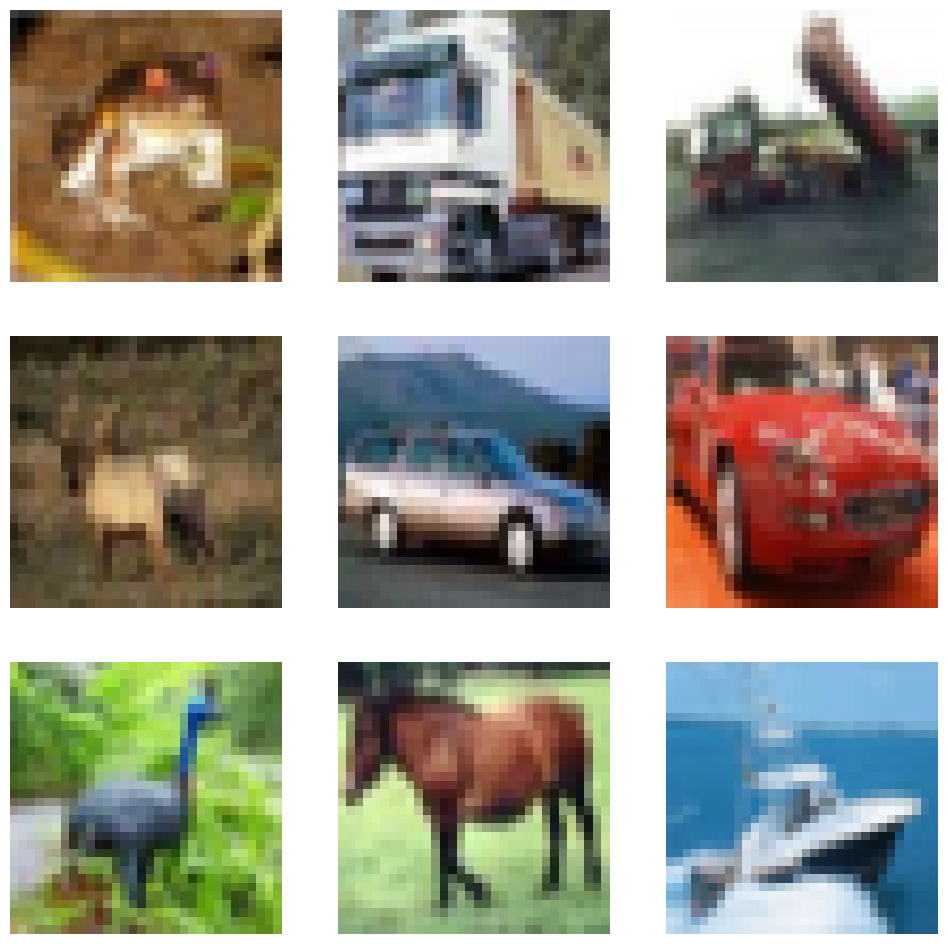

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3

# save x_test images
xx_test = x_test
yy_test = y_test

fig = plt.figure(figsize=(8, 8))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i])
plt.show()

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:
 # labels
num_classes=10
print(y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(50000, 1)
(50000, 10)


In [ ]:
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0



'''
model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
'''

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# Freeze base model
base_model.trainable = False

# Create new model on top.
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

#**Training without augmentation**

In [ ]:

# training without augmentation
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 17s 18ms/step - loss: 1.4353 - accuracy: 0.5257 - val_loss: 1.0984 - val_accuracy: 0.6131
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 0.8582 - accuracy: 0.6971 - val_loss: 0.8362 - val_accuracy: 0.7116
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 0.6712 - accuracy: 0.7643 - val_loss: 0.7221 - val_accuracy: 0.7569
Epoch 4/100
391/391 [==============================] - 6s 16ms/step - loss: 0.5595 - accuracy: 0.8058 - val_loss: 0.7378 - val_accuracy: 0.7593
Epoch 5/100
391/391 [==============================] - 6s 16ms/step - loss: 0.4703 - accuracy: 0.8369 - val_loss: 0.6559 - val_accuracy: 0.7838
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 0.3976 - accuracy: 0.8621 - val_loss: 0.7059 - val_accuracy: 0.7751
Epoch 7/100
391/391 [==============================] - 6s 16ms/step - loss: 0.3248 - accuracy: 0.8874 - val_loss: 0.6289 - val_accuracy

In [ ]:
#training accuracy without dropout
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc

391/391 [==============================] - 2s 6ms/step - loss: 0.0045 - accuracy: 0.9986


[0.00454736640676856, 0.9985799789428711]

In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

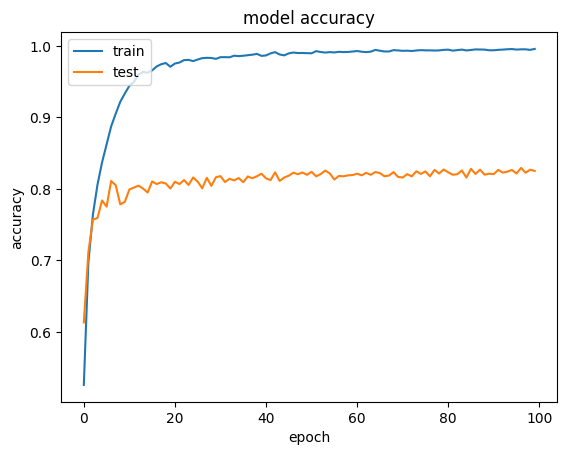

In [ ]:
plothist(history)

#<font color='green'> **Summary:**

* <span style="color:#000000">Many new methods were developed recently\.</span>

* <span style="color:#000000">Machine Learning approach becomes to be used not only for classification\, but also for generative tasks\.</span>

* <span style="color:#000000">Each month new application appear\! </span>
